In [105]:
#setup 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

from matplotlib.patches import Polygon
betfair_path = "betfair_final.csv"
bf_data = pd.read_csv(betfair_path)
bf_data.head()

,SPORTS_ID,EVENT_ID,SETTLED_DATE,FULL_DESCRIPTION,SCHEDULED_OFF,EVENT,DT ACTUAL_OFF,SELECTION_ID,SELECTION,ODDS,...,WIN_FLAG,IN_PLAY,WIN_AMOUNT,LOSS_AMOUNT,COUNTRY,CITY,LATITUDE,LONGITUDE,TEMPERATURE,RAIN
0,Soccer,115279736,4/9/2014 17:07,U21 Euro Championship/Qualifiers/Fixtures 04 S...,4/9/2014 15:30,Over/Under,4/9/2014 15:32,1221386,Over 1.5 Goals,1.35,...,1,IP,1033.4790,0.0,Ukraine,Kyiv,50.450034,30.524136,17.1,0
1,Tennis,115288925,4/9/2014 11:50,Group A/Brasov Challenger 2014/Second Round Ma...,4/9/2014 10:30,Match Odds,4/9/2014 10:34,7659748,Aslan Karatsev,1.12,...,1,IP,4297.1040,0.0,Romania,Brasov,45.652510,25.610565,22.1,0
2,Soccer,115196118,3/9/2014 15:08,U21 Euro Championship/Qualifiers/Fixtures 03 S...,3/9/2014 14:00,Over/Under,3/9/2014 14:00,1221386,Over 1.5 Goals,2.10,...,1,IP,1313.6340,0.0,Latvia,Riga,56.949398,24.105185,17.4,0
3,Soccer,115236324,1/9/2014 19:46,Irish Soccer/FAI Ford Cup/Fixtures 01 Septembe...,1/9/2014 19:00,Over/Under,1/9/2014 19:01,5851483,Over 0.5 Goals,1.10,...,1,IP,1294.1060,0.0,Ireland,Dublin,53.349379,-6.260559,16.1,0
4,Soccer,115184779,2/9/2014 18:38,Swedish Soccer/Superettan/Fixtures 02 Septembe...,2/9/2014 17:20,Over/Under,2/9/2014 17:20,1221386,Over 1.5 Goals,1.34,...,1,IP,1210.2612,0.0,Sweden,Stockholm,59.325117,18.071093,15.3,0


In [106]:
#summary statistics 

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following: 
# mean, median, variance, standard deviation, and SEM of odds.
mean = bf_data['ODDS'].groupby(bf_data['EVENT']).mean()
median = bf_data['ODDS'].groupby(bf_data['EVENT']).median()
var = bf_data['ODDS'].groupby(bf_data['EVENT']).var()
std = bf_data['ODDS'].groupby(bf_data['EVENT']).std()
sem = bf_data['ODDS'].groupby(bf_data['EVENT']).sem()

# Assemble the resulting series into a single summary DataFrame.

statistics_summary = pd.DataFrame({'Mean Odds' : mean, 'Median Odds' : median, 'Odds Variance': var, 'Odds Std. Dev.' : std, 'Odds Std. Err' : sem })
statistics_summary

,Mean Odds,Median Odds,Odds Variance,Odds Std. Dev.,Odds Std. Err
EVENT,,,,,
Correct Score,34.115512,8.800,12259.379346,110.722082,0.302209
First Half,3.089994,2.000,22.069821,4.697853,0.022237
Game,3.114060,1.645,534.366026,23.116358,0.211251
Goal,8.020612,3.200,1210.249678,34.788643,0.270387
Half Time,14.265157,3.450,3933.909404,62.720885,0.212885
Match Odds,39.385676,2.780,20660.272552,143.736817,0.289061
Moneyline,14.974638,1.900,6768.144658,82.268734,0.635987
Other,9.224445,2.040,1578.478205,39.730067,0.177467
Over/Under,5.289708,1.900,354.805612,18.836284,0.031600


In [107]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  bf_data.groupby(['EVENT'])[['ODDS']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

ODDS                                           
                     mean median           var         std       sem
EVENT                                                               
Correct Score   34.115512  8.800  12259.379346  110.722082  0.302209
First Half       3.089994  2.000     22.069821    4.697853  0.022237
Game             3.114060  1.645    534.366026   23.116358  0.211251
Goal             8.020612  3.200   1210.249678   34.788643  0.270387
Half Time       14.265157  3.450   3933.909404   62.720885  0.212885
Match Odds      39.385676  2.780  20660.272552  143.736817  0.289061
Moneyline       14.974638  1.900   6768.144658   82.268734  0.635987
Other            9.224445  2.040   1578.478205   39.730067  0.177467
Over/Under       5.289708  1.900    354.805612   18.836284  0.031600
Set Betting     30.229781  3.750  19848.090571  140.883252  1.466182
Winner         110.055526  3.400  46176.515306  214.887215  1.099905

In [108]:

event_count = bf_data["EVENT"].value_counts()
event_count

EVENT
Over/Under       355316
Match Odds       247261
Correct Score    134231
Half Time         86803
Other             50119
First Half        44634
Winner            38169
Moneyline         16733
Goal              16554
Game              11974
Set Betting        9233
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Bets per Event Type')

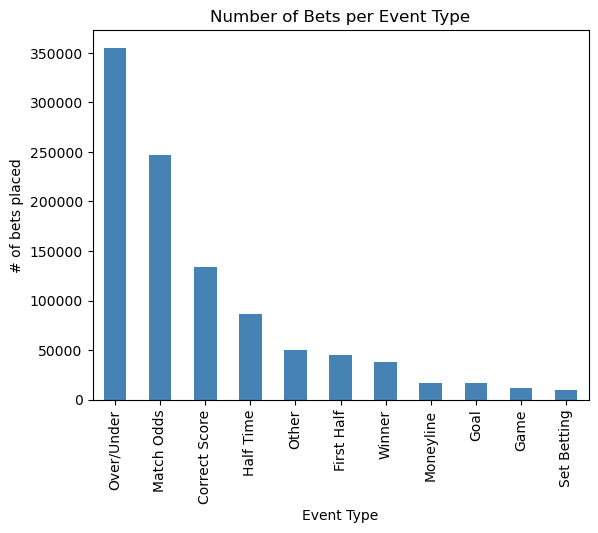

In [109]:
#generating a bar graph for bets per event type 
event_count_bar = event_count.plot.bar(color='steelblue')  
plt.xlabel("Event Type")
plt.ylabel("# of bets placed")
plt.title("Number of Bets per Event Type")

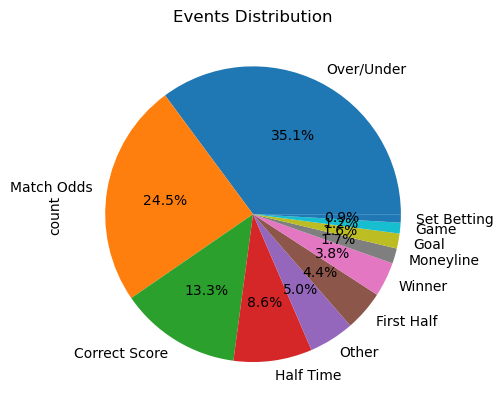

In [110]:
#pie plot showing the distribution of bet types 
bets_pie = bf_data['EVENT'].value_counts()
plt.title('Events Distribution')
bets_pie.plot.pie(autopct= "%1.1f%%")
plt.show()

In [111]:
#calculating statistical summary of odds per event type accross all event type
event_type_list = ["Over/Under", "Match Odds", "Game", "Half Time", "Moneyline", "Correct Score", "Other", "First Half", "Winner", "Set Betting", "Goal"]
events = bf_data[bf_data["EVENT"].isin(event_type_list)]

In [112]:
over_under = bf_data.loc[bf_data["EVENT"] == "Over/Under"]
match_odds = bf_data.loc[bf_data["EVENT"] == "Match Odds"]
game = bf_data.loc[bf_data["EVENT"] == "Game"]
half_time = bf_data[bf_data["EVENT"]== "Half Time"]
moneyline = bf_data.loc[bf_data["EVENT"] == "Moneyline"]
correct_score = bf_data.loc[bf_data["EVENT"] == "Correct Score"]
other = bf_data.loc[bf_data["EVENT"] == "Other"]
first_half = bf_data.loc[bf_data["EVENT"] == "First Half"]
winner = bf_data.loc[bf_data["EVENT"] == "Winner"]
set_betting = bf_data.loc[bf_data["EVENT"] == "Set Betting"]
goal = bf_data.loc[bf_data["EVENT"] == "Goal"]

event_type_box_plot_df = pd.DataFrame({"Over/Under": over_under["ODDS"],
                                            "Match Odds": match_odds["ODDS"],
                                              "Game": game["ODDS"],
                                                "Half Time" : half_time["ODDS"],
                                                  "Moneyline": moneyline["ODDS"],
                                                    "Correct Score": correct_score["ODDS"],
                                                         "Other": other["ODDS"], 
                                                                "First Half": first_half["ODDS"],
                                                                   "Winner" : winner["ODDS"],
                                                                        "Set Betting" : set_betting["ODDS"],
                                                                              "Goal": goal["ODDS"],
                                      })
event_type_box_plot_df


,Over/Under,Match Odds,Game,Half Time,Moneyline,Correct Score,Other,First Half,Winner,Set Betting,Goal
0,1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1011022,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011023,3.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011024,4.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.92,NaN,NaN


In [113]:
# Put event types  into a list for for loop (and later for plot labels)   
# Create empty list to fill with odd data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

last = events.groupby(["EVENT", "EVENT_ID"]).agg(odds = ("ODDS", lambda x: x.iloc[-1]))
last = last.stack(level=0).unstack(level=0)

In [114]:
count = 0
for events in event_type_list:
    quartiles = last[events].quantile([.25,.5,.75]).round(2)
    lower_quartile = quartiles[0.25].round(2)
    upper_quartile = quartiles[0.75].round(2)
    interquartile_range = round(upper_quartile-lower_quartile,2)
    lower_outlier = round(lower_quartile - (1.5*interquartile_range),2)
    upper_outlier= round(upper_quartile + (1.5*interquartile_range),2)


    if count == 0:
        print(f"------------------------------------------------------------")
    print(f"{events}:")
    print(f"The lower quartile: {lower_quartile}")
    print(f"The upper quartile: {upper_quartile}")
    print(f"The interquartile range: {interquartile_range}")
    print(f"Values below {lower_outlier} could be possible outliers.")
    print(f"Values above {upper_outlier} could be possible outliers.")
    print(f"------------------------------------------------------------")
    count +=1 

------------------------------------------------------------
Over/Under:
The lower quartile: 1.05
The upper quartile: 3.84
The interquartile range: 2.79
Values below -3.14 could be possible outliers.
Values above 8.02 could be possible outliers.
------------------------------------------------------------
Match Odds:
The lower quartile: 1.55
The upper quartile: 8.3
The interquartile range: 6.75
Values below -8.57 could be possible outliers.
Values above 18.42 could be possible outliers.
------------------------------------------------------------
Game:
The lower quartile: 1.13
The upper quartile: 1.9
The interquartile range: 0.77
Values below -0.03 could be possible outliers.
Values above 3.06 could be possible outliers.
------------------------------------------------------------
Half Time:
The lower quartile: 1.66
The upper quartile: 7.4
The interquartile range: 5.74
Values below -6.95 could be possible outliers.
Values above 16.01 could be possible outliers.
------------------------

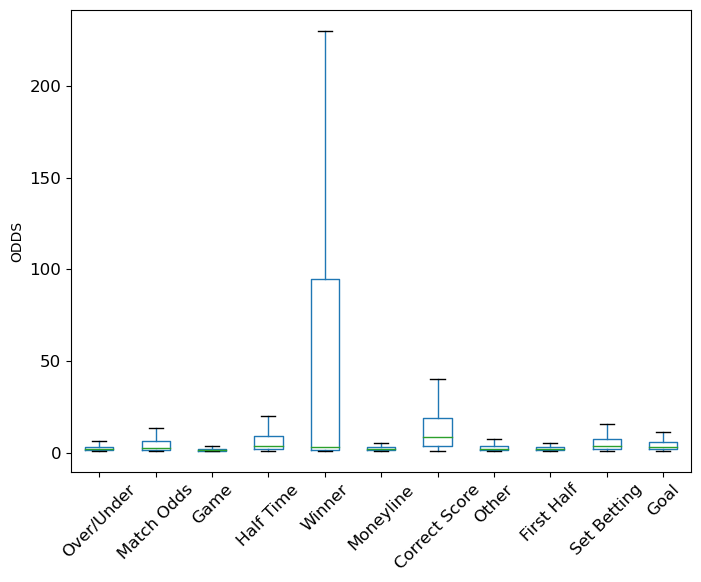

In [115]:
#generate box plot with event type odd vs event type  data 
# Generate a box plot of all the event types based on odds 
labels = ["Over/Under", "Match Odds", "Game", "Half Time", "Winner", "Moneyline", "Correct Score", "Other", "First Half", "Set Betting", "Goal"]
fig1, ax1 = plt.subplots(figsize=(8,6))
boxplot = event_type_box_plot_df.boxplot(column = labels, grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()

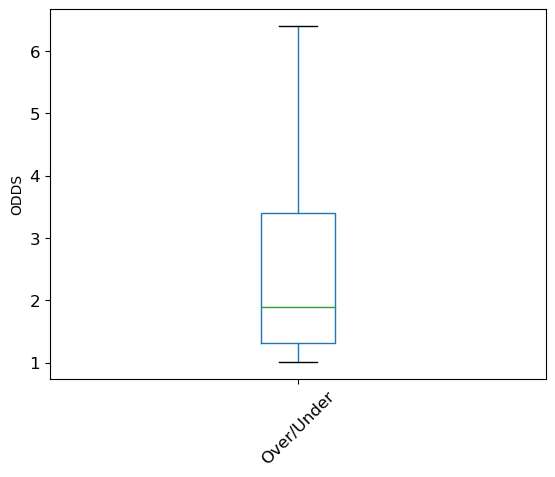

In [116]:
#over under boxplot 
over_under = bf_data.loc[bf_data["EVENT"] == "Over/Under"]
over_under_box_plot_df = pd.DataFrame({"Over/Under": over_under["ODDS"]})
fig1, ax1 = plt.subplots()
over_under_box_plot = over_under_box_plot_df.boxplot(column = ["Over/Under"] , grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()

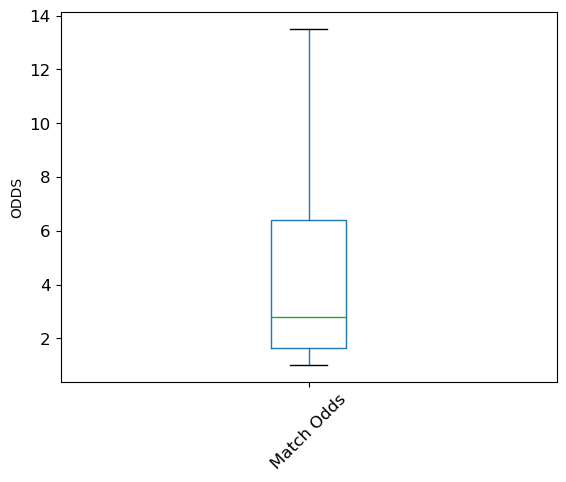

In [117]:
#match odds boxplot 
match_odds = bf_data.loc[bf_data["EVENT"] == "Match Odds"]
match_odds_box_plot_df = pd.DataFrame({"Match Odds": match_odds["ODDS"]})
fig1, ax1 = plt.subplots()
match_odds_box_plot = match_odds_box_plot_df.boxplot(column = ["Match Odds"] , grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()

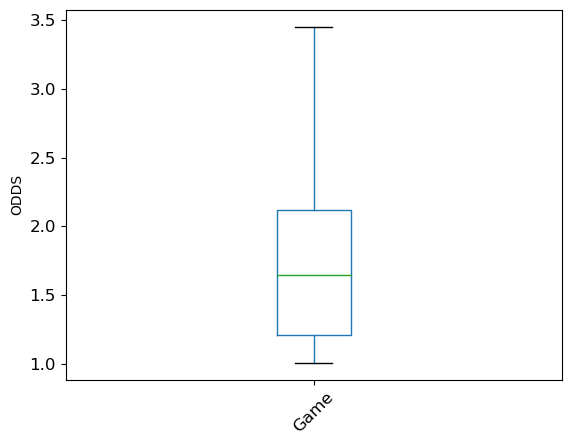

In [118]:
#game boxplot 
game = bf_data.loc[bf_data["EVENT"] == "Game"]
game_box_plot_df = pd.DataFrame({"Game": game["ODDS"]})
fig1, ax1 = plt.subplots()
game_plot = game_box_plot_df.boxplot(column = ["Game"] , grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()

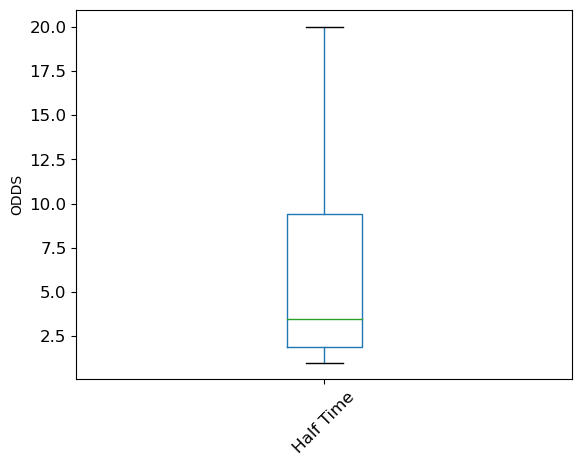

In [119]:
#half time boxpplot 
half_time = bf_data.loc[bf_data["EVENT"] == "Half Time"]
half_time_box_plot_df = pd.DataFrame({"Half Time": half_time["ODDS"]})
fig1, ax1 = plt.subplots()
half_time_box_plot = half_time_box_plot_df.boxplot(column = ["Half Time"] , grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()

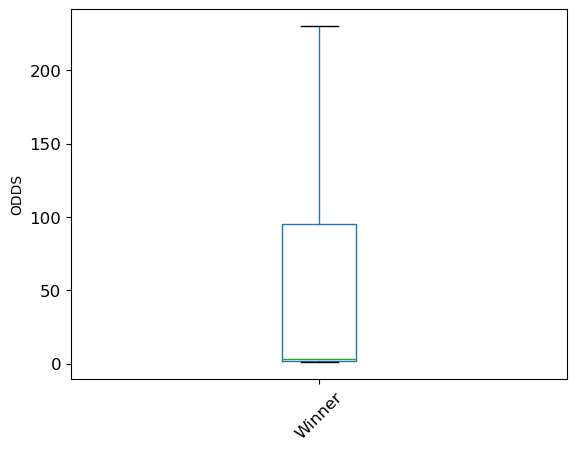

In [120]:
#winner boxpplot 
winner = bf_data.loc[bf_data["EVENT"] == "Winner"]
winner_box_plot_df = pd.DataFrame({"Winner": winner["ODDS"]})
fig1, ax1 = plt.subplots()
winner_box_plot = winner_box_plot_df.boxplot(column = ["Winner"] , grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()

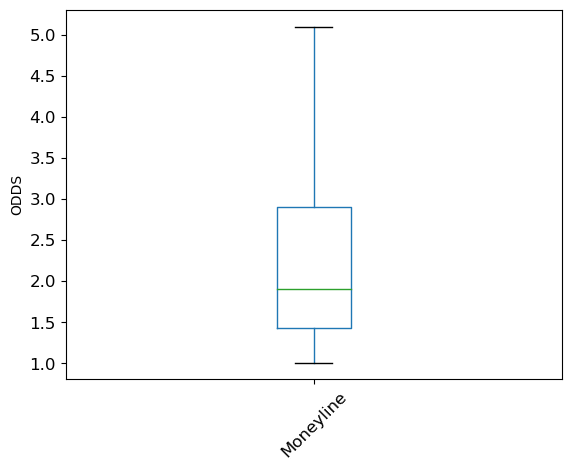

In [121]:
#moneyline boxplot 
moneyline = bf_data.loc[bf_data["EVENT"] == "Moneyline"]
moneyline_box_plot_df = pd.DataFrame({"Moneyline": moneyline["ODDS"]})
fig1, ax1 = plt.subplots()
moneyline_box_plot = moneyline_box_plot_df.boxplot(column = ["Moneyline"] , grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()

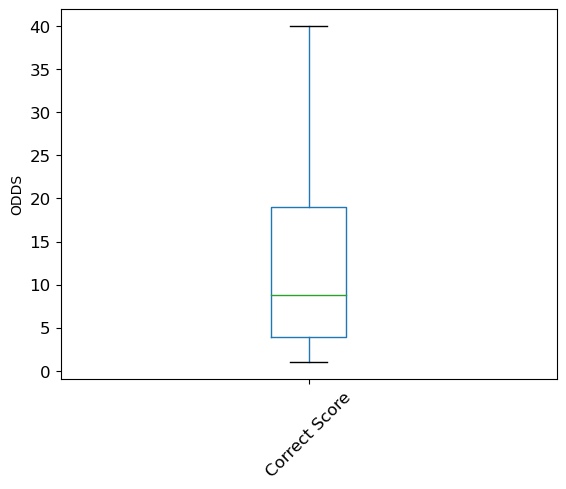

In [122]:
#correct score boxplot 
correct_score = bf_data.loc[bf_data["EVENT"] == "Correct Score"]
correct_score_box_plot_df = pd.DataFrame({"Correct Score": correct_score["ODDS"]})
fig1, ax1 = plt.subplots()
correct_score_box_plot = correct_score_box_plot_df.boxplot(column = ["Correct Score"] , grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()

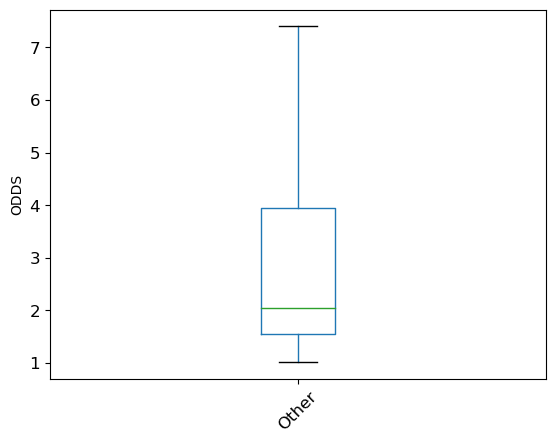

In [123]:
#other boxplot 
other = bf_data.loc[bf_data["EVENT"] == "Other"]
other_box_plot_df = pd.DataFrame({"Other": other["ODDS"]})
fig1, ax1 = plt.subplots()
other_box_plot = other_box_plot_df.boxplot(column = ["Other"] , grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()


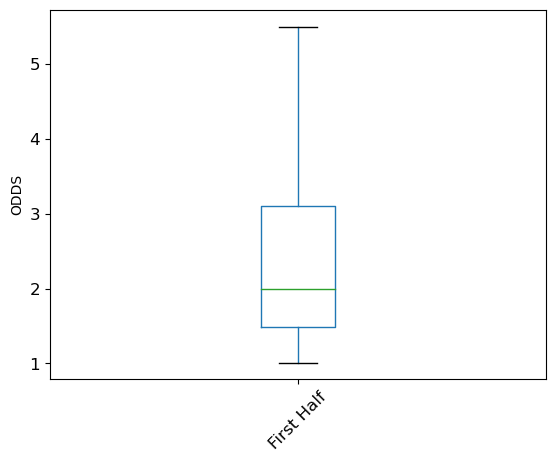

In [124]:
#first half boxplot 
first_half = bf_data.loc[bf_data["EVENT"] == "First Half"]
first_half_box_plot_df = pd.DataFrame({"First Half": first_half["ODDS"]})
fig1, ax1 = plt.subplots()
first_half_box_plot = first_half_box_plot_df.boxplot(column = ["First Half"] , grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()


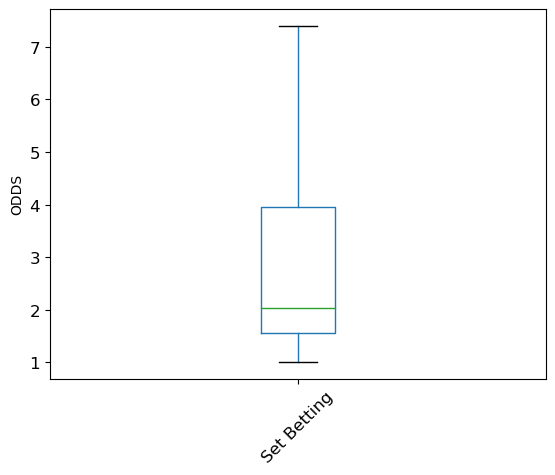

In [125]:
#set betting boxplot 
set_betting = bf_data.loc[bf_data["EVENT"] == "Set Betting"]
set_betting_box_plot_df = pd.DataFrame({"Set Betting": other["ODDS"]})
fig1, ax1 = plt.subplots()
set_betting_box_plot = set_betting_box_plot_df.boxplot(column = ["Set Betting"] , grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()

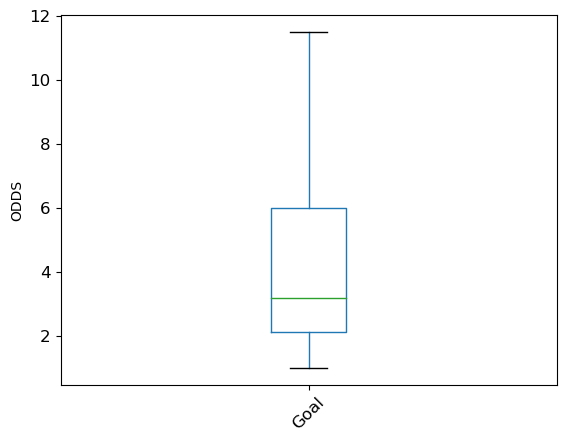

In [126]:
#goal boxplot 
goal = bf_data.loc[bf_data["EVENT"] == "Goal"]
goal_box_plot_df = pd.DataFrame({"Goal": goal["ODDS"]})
fig1, ax1 = plt.subplots()
goal_box_plot = goal_box_plot_df.boxplot(column = ["Goal"] , grid = False, rot = 45 , fontsize = 12, showfliers = False)
ax1.set_ylabel("ODDS")
plt.show()